<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/predicting_palantir_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance

In [3]:
# Getting dependencies
from datetime import datetime
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf



In [6]:
# getting data from yahoo Finance
ticker = "PLTR"
data = yf.download(ticker, start="2020-01-01", end=datetime.now())
data.head()
data.to_csv("palantir_stocks.csv") # saves the dataset so we do not reload it everytime


[*********************100%***********************]  1 of 1 completed


In [5]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
Date,,,,,
2025-01-13,64.980003,65.680000,63.400002,64.290001,69046300
2025-01-14,65.910004,68.230003,65.190002,67.180000,56814900
2025-01-15,68.139999,68.849998,67.080002,68.550003,56025800
2025-01-16,69.239998,71.430000,68.360001,69.080002,62724900
2025-01-17,71.669998,71.709999,69.949997,70.800003,34065174


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1081 entries, 2020-09-30 to 2025-01-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, PLTR)   1081 non-null   float64
 1   (High, PLTR)    1081 non-null   float64
 2   (Low, PLTR)     1081 non-null   float64
 3   (Open, PLTR)    1081 non-null   float64
 4   (Volume, PLTR)  1081 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 50.7 KB


In [8]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
count,1081.000000,1081.000000,1081.000000,1081.000000,1.081000e+03
mean,20.580460,21.126668,20.008368,20.562553,5.538367e+07
std,13.610104,13.946890,13.188713,13.578719,4.102243e+07
min,6.000000,6.170000,5.920000,5.980000,9.126400e+06
25%,10.180000,10.570000,9.890000,10.140000,3.216400e+07
50%,18.340000,18.980000,17.930000,18.370001,4.358250e+07
75%,24.700001,25.410000,24.139999,24.760000,6.278060e+07
max,82.379997,84.796997,81.300003,83.160004,4.502905e+08


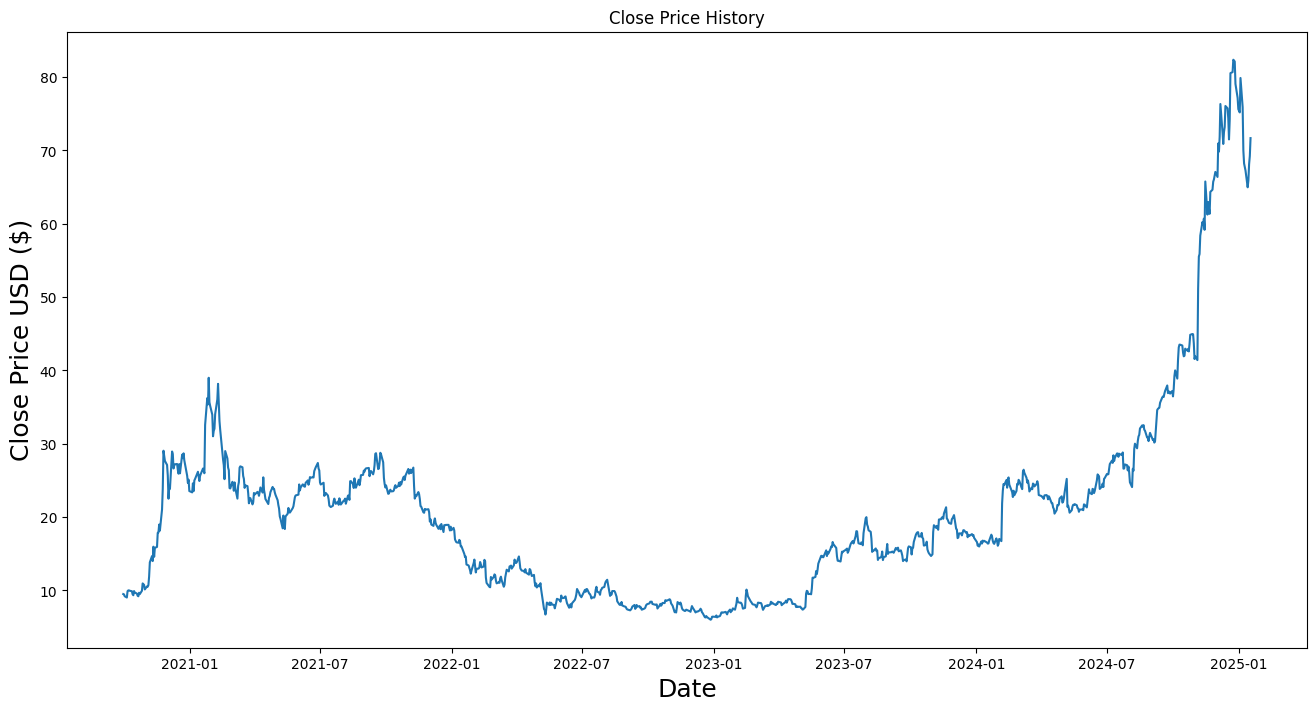

In [9]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

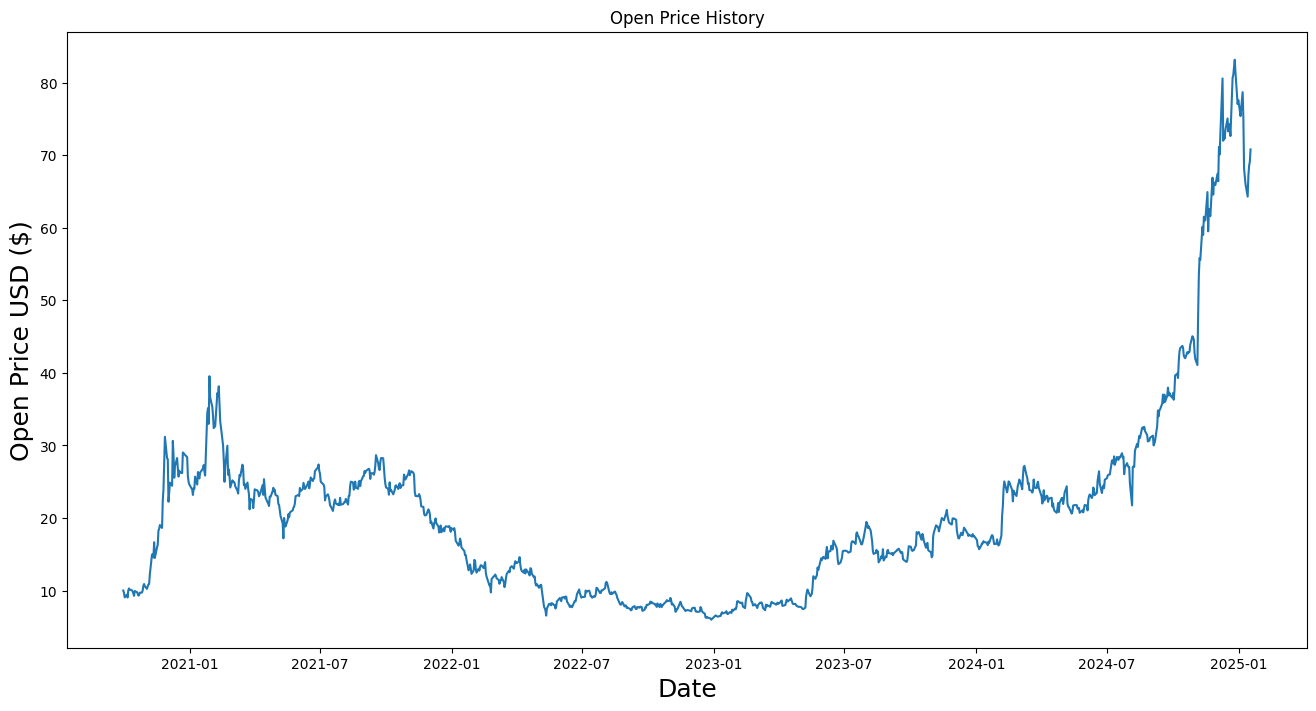

In [10]:
plt.figure(figsize=(16,8))
plt.title("Open Price History")
plt.plot(data["Open"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Open Price USD ($)", fontsize=18)
plt.show()

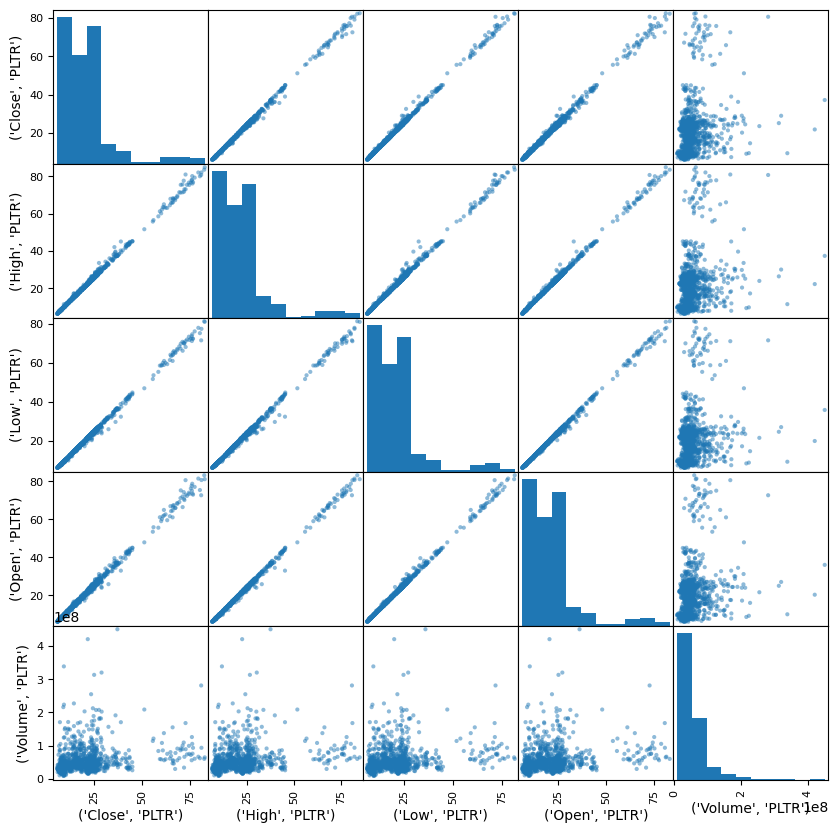

In [12]:
#plotting scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(10, 10))
plt.show()

In [14]:
# selecting numerical datat types
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [15]:
#correlation Matrix between numerical data
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

Price             Close      High       Low      Open    Volume
Ticker             PLTR      PLTR      PLTR      PLTR      PLTR
Price  Ticker                                                  
Close  PLTR    1.000000  0.998933  0.998765  0.997676  0.241883
High   PLTR    0.998933  1.000000  0.998102  0.998656  0.252639
Low    PLTR    0.998765  0.998102  1.000000  0.998798  0.221713
Open   PLTR    0.997676  0.998656  0.998798  1.000000  0.233062
Volume PLTR    0.241883  0.252639  0.221713  0.233062  1.000000


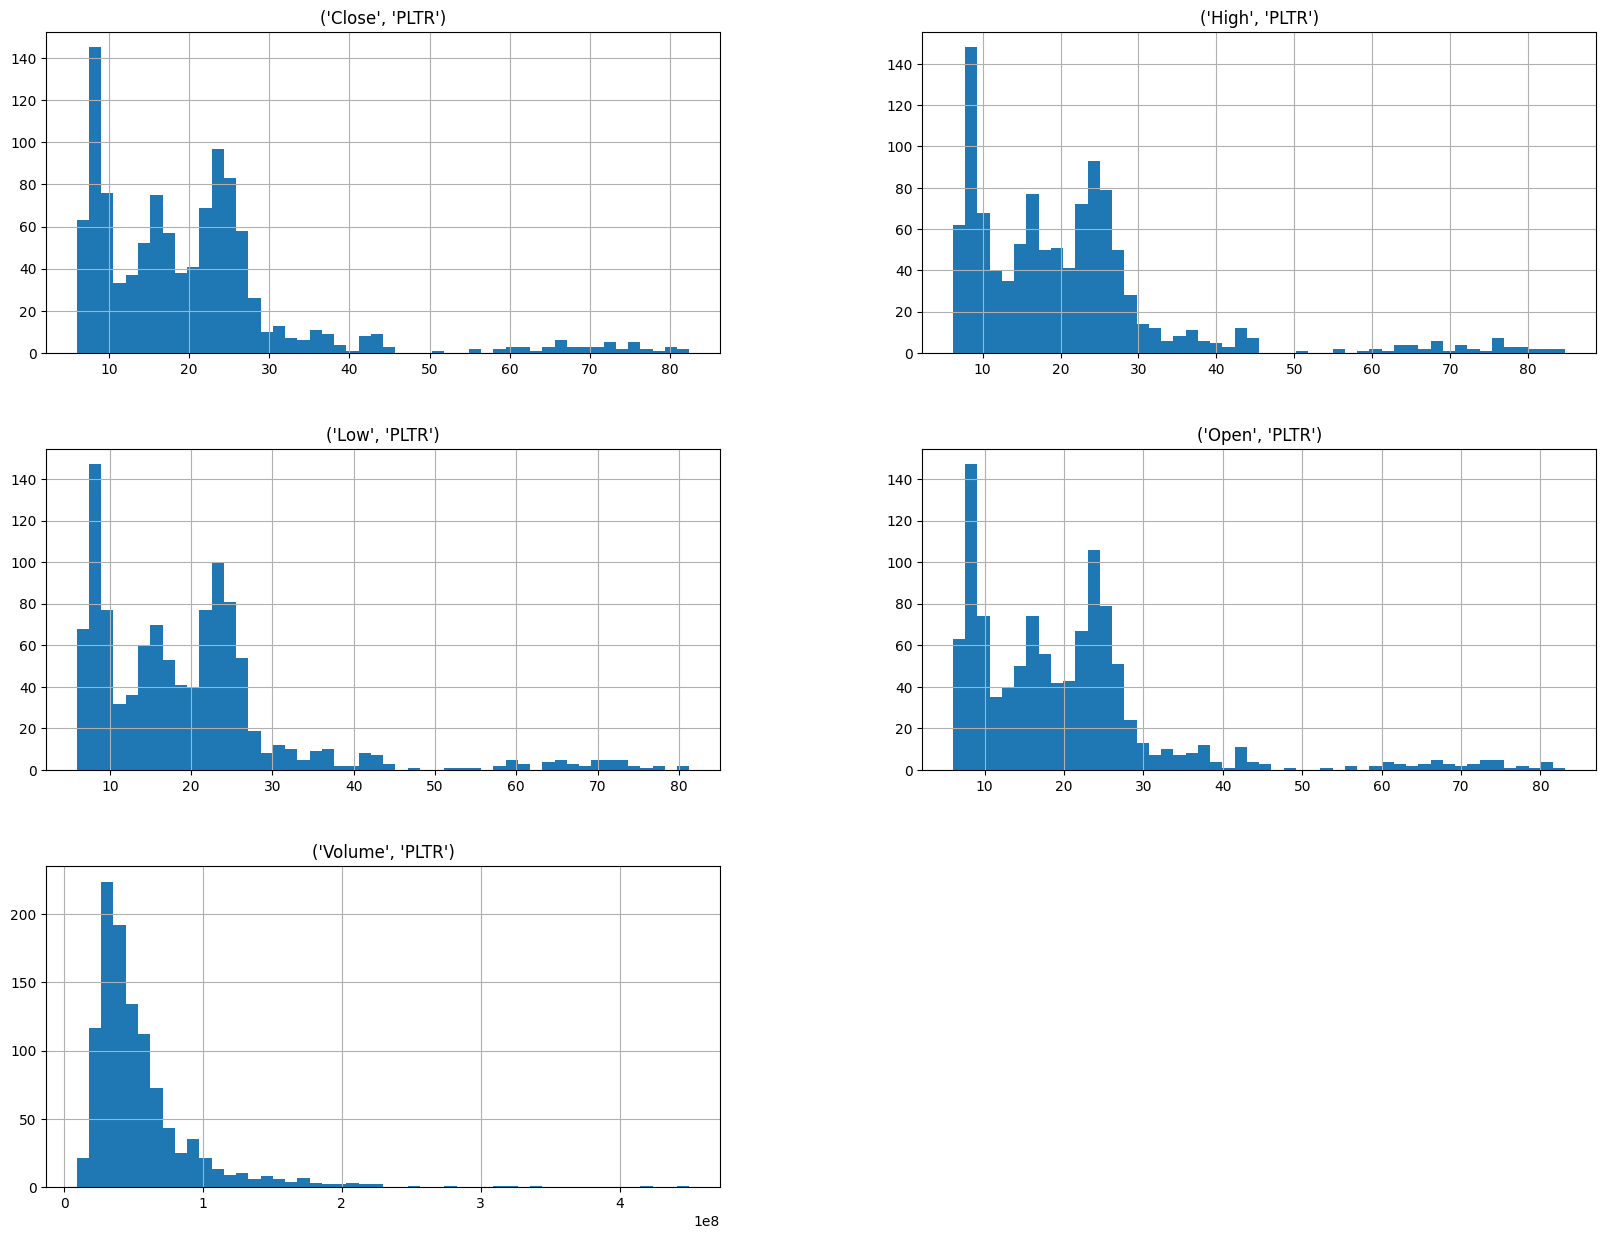

In [16]:
#ploting histogram for all features
data.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
#Normalizing all the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.04582352, 0.06664377, 0.04231891, 0.05208603, 0.74679241],
       [0.04529982, 0.04998284, 0.04391084, 0.04806944, 0.26106204],
       [0.04189578, 0.03955384, 0.04006367, 0.03990671, 0.10402456],
       ...,
       [0.81356378, 0.79718164, 0.81135579, 0.81070226, 0.10630829],
       [0.82796544, 0.82999482, 0.8283364 , 0.8175693 , 0.12149334],
       [0.86001179, 0.83355592, 0.84942948, 0.83985488, 0.05661838]])

In [23]:
#converting scaled_data to pandas dataframe
data_new = pd.DataFrame(scaled_data, columns=data.columns)
data_new


Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
0,0.045824,0.066644,0.042319,0.052086,0.746792
1,0.045300,0.049983,0.043911,0.048069,0.261062
2,0.041896,0.039554,0.040064,0.039907,0.104025
3,0.039670,0.042225,0.039798,0.044701,0.061634
4,0.051060,0.051000,0.039533,0.039648,0.185277
...,...,...,...,...,...
1076,0.772192,0.756865,0.762536,0.755507,0.135822
1077,0.784368,0.789296,0.786283,0.792952,0.108097
1078,0.813564,0.797182,0.811356,0.810702,0.106308


In [28]:
# defining features and target variables
target = "Close"
features = data_new.drop(target, axis=1)
target = data_new[target]

# separating into two dataframes
X = features
y = target




In [29]:
# splitting Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# fitting the lenear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
#printing the linear reression equations
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.00017873]
Coefficients: [[ 0.70426683  0.81493553 -0.50923083  0.00482049]]


In [35]:
# Get and print the equation
equation = f"y = {model.intercept_[0]:.2f}"
for i, feature in enumerate(X.columns):
    equation += f" + {model.coef_[0][i]:.2f} * {feature}"
print(equation)

y = 0.00 + 0.70 * ('High', 'PLTR') + 0.81 * ('Low', 'PLTR') + -0.51 * ('Open', 'PLTR') + 0.00 * ('Volume', 'PLTR')


In [37]:
# testing the data
y_pred = model.predict(X_test)

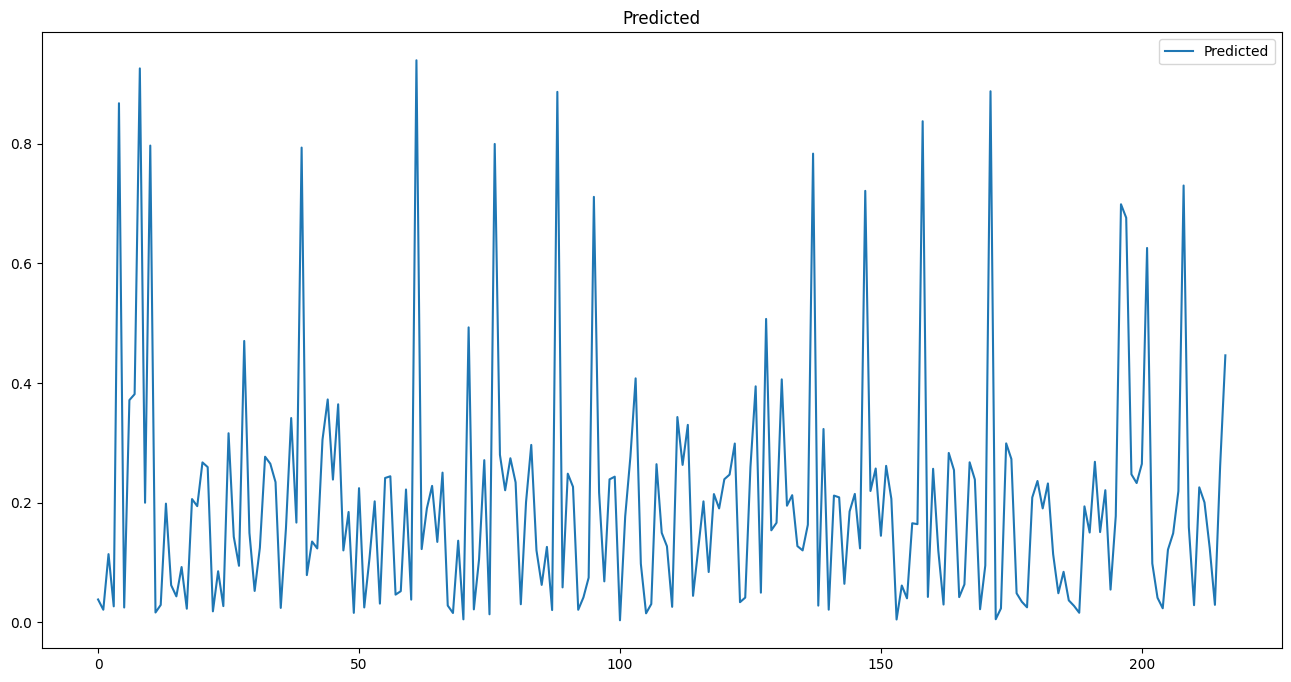

In [42]:
#graph of predicted alues
plt.figure(figsize=(16,8))
plt.title("Predicted")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

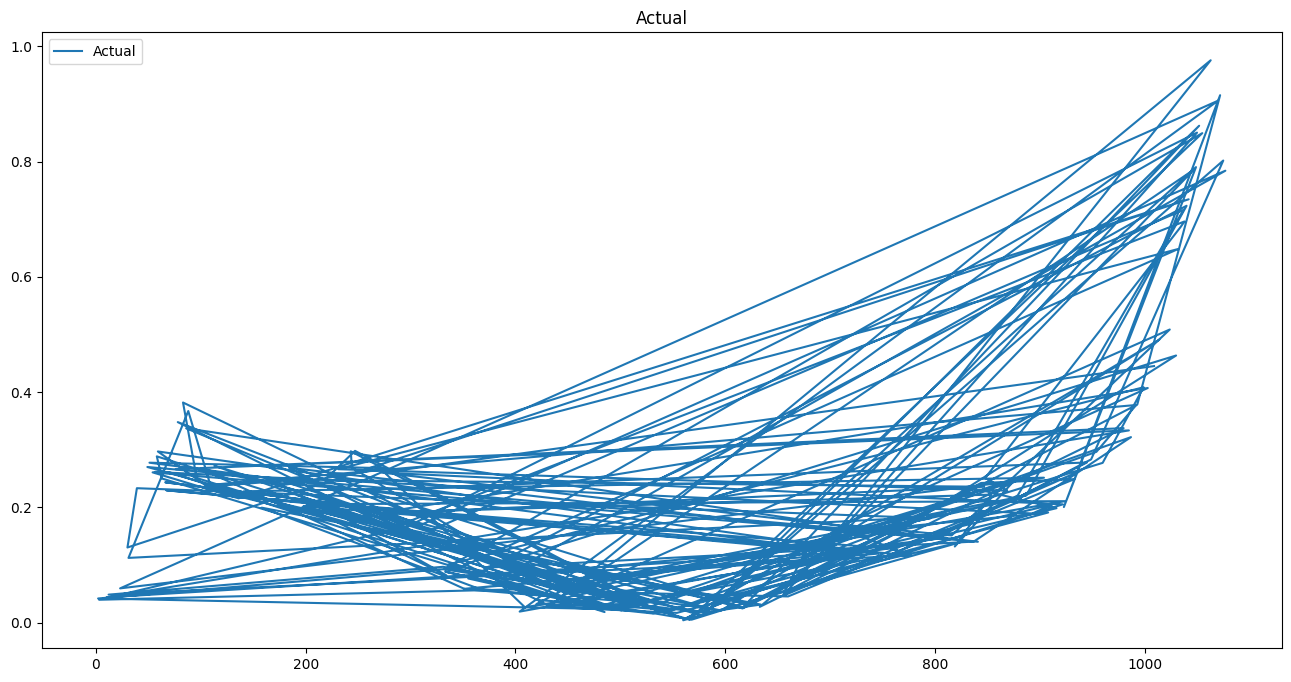

In [45]:
#graph of actual test data
plt.figure(figsize=(16,8))
plt.title("Actual")
plt.plot(y_test, label="Actual")
plt.legend()
plt.show()

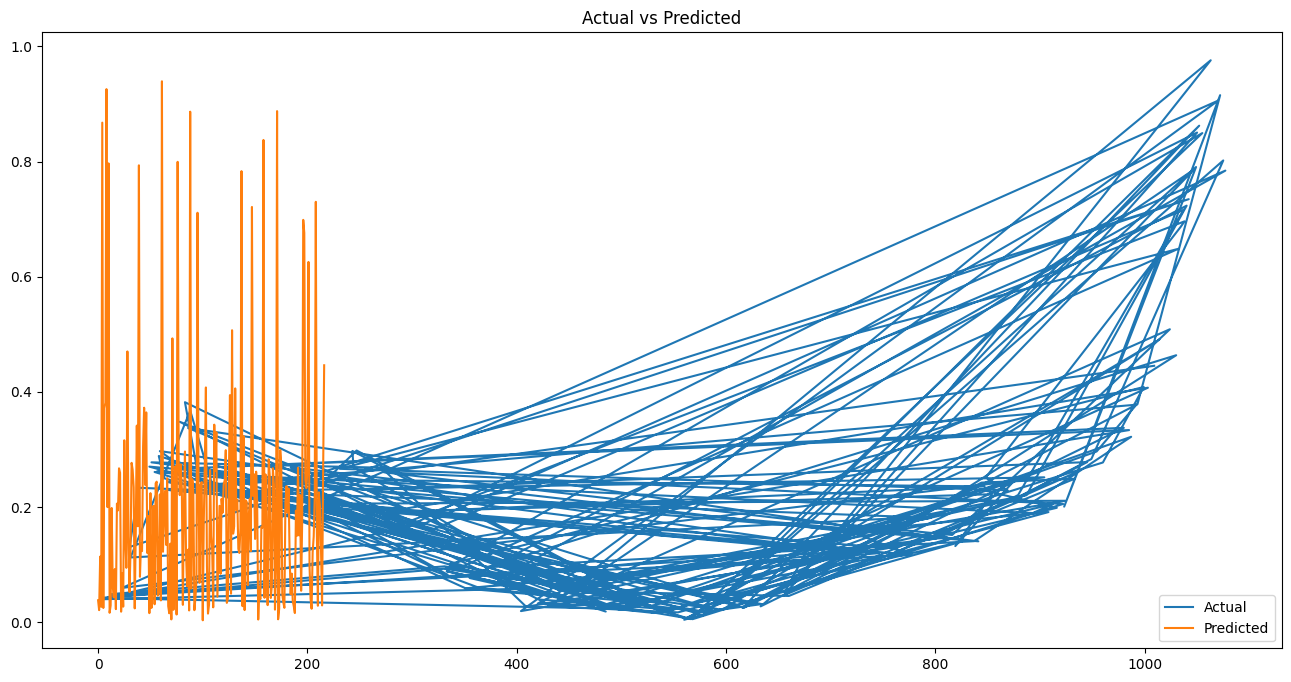

In [46]:
#ploting actual and predicted model
plt.figure(figsize=(16,8))
plt.title("Actual vs Predicted")
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

In [47]:
#calculating the mean square error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.1994606442822715e-05


In [48]:
# calculating the r score
r_error = r2_score(y_test, y_pred)
print("R score:", r_error)

R score: 0.9989518100746183


In [49]:
#perform cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.99255286 0.99855956 0.98258347 0.9949769  0.99869329]


In [55]:
# fitting kneighbour regressor
model_k = KNeighborsRegressor(n_neighbors=5)
model_k.fit(X_train, y_train)

KNeighborsRegressor()

In [56]:
#testing the model
y_pred_k = model_k.predict(X_test)


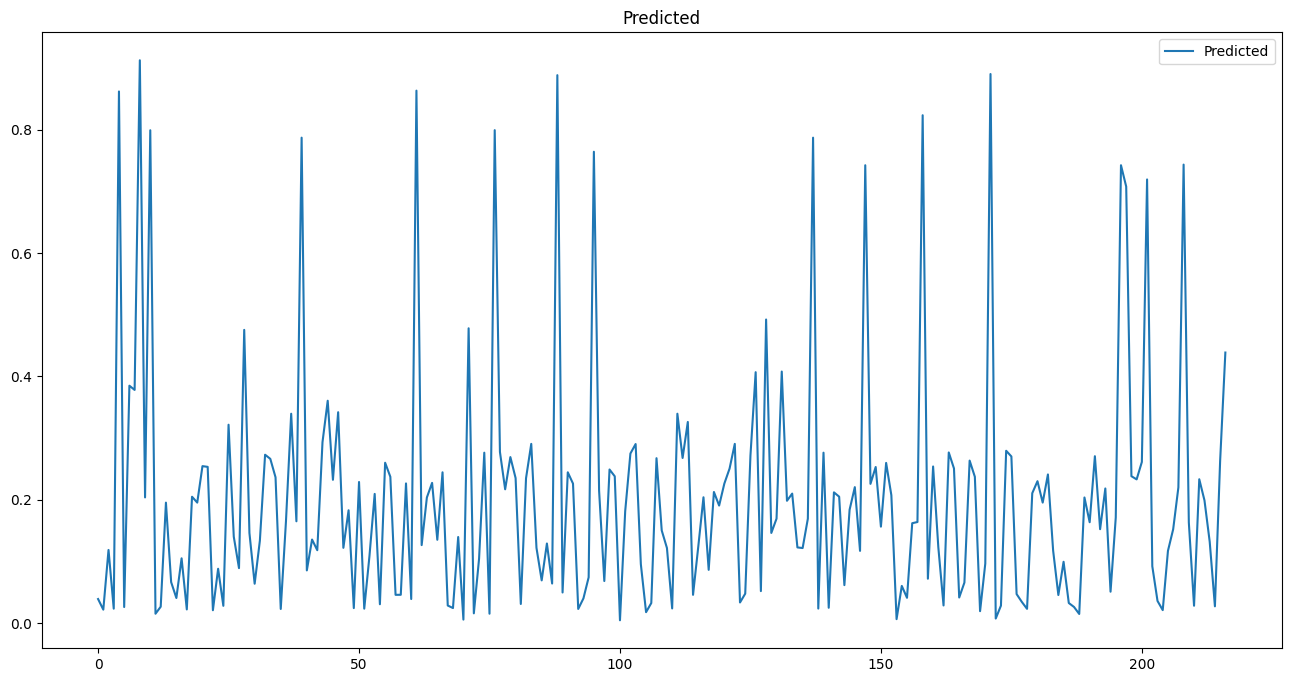

In [57]:
#plot the predicted values
plt.figure(figsize=(16,8))
plt.title("Predicted")
plt.plot(y_pred_k, label="Predicted")
plt.legend()
plt.show()

In [58]:
#calculate the mean square error for the kneighbour
mse_k = mean_squared_error(y_test, y_pred_k)
print("Mean Squared Error:", mse_k)


Mean Squared Error: 0.00026091332465057393


In [59]:
# calulating the r score
r_error_k = r2_score(y_test, y_pred_k)
print("R score:", r_error_k)

R score: 0.9934875751563733


In [60]:
# building decision trees
model_d = DecisionTreeRegressor()
model_d.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
#test the model
y_pred_d = model_d.predict(X_test)

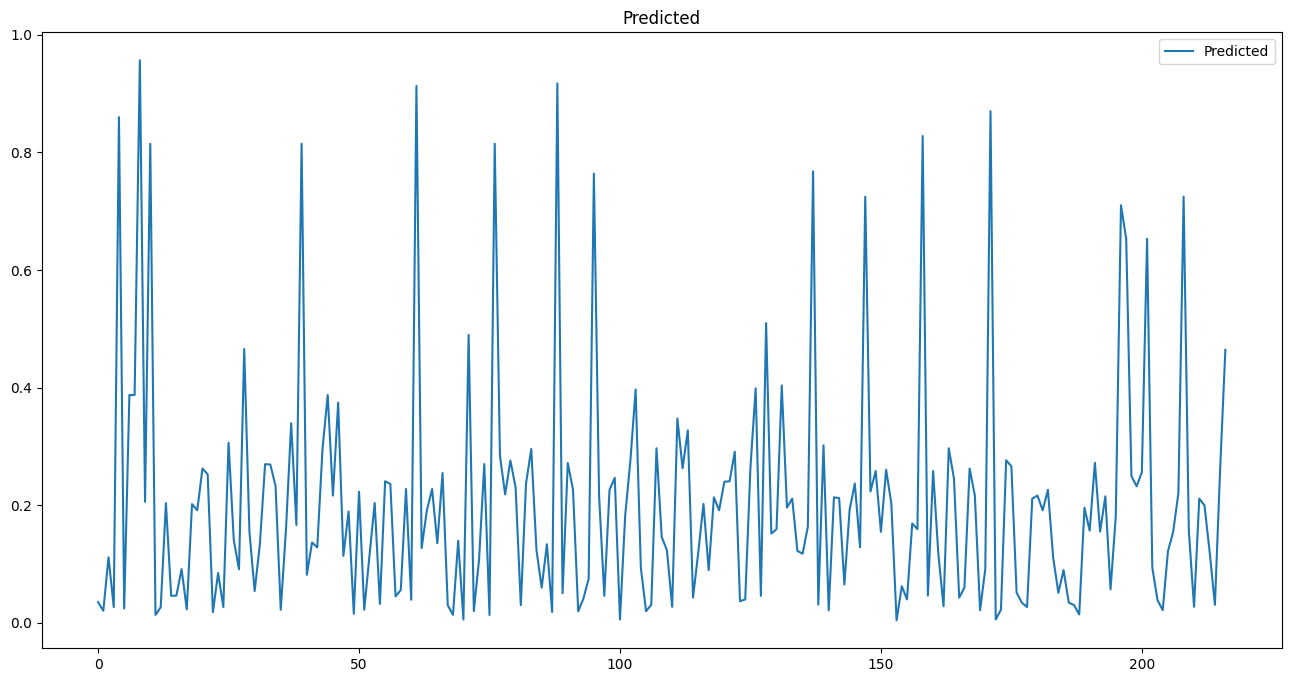

In [63]:
#plot prdicted values
plt.figure(figsize=(16,8))
plt.title("Predicted")
plt.plot(y_pred_d, label="Predicted")
plt.legend()
plt.show()

In [64]:
#calculate the mean square error
mse_d = mean_squared_error(y_test, y_pred_d)
print("Mean Squared Error:", mse_d)

Mean Squared Error: 0.00010920301477773802


In [65]:
# using random forest regressor
model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [67]:
# fit the model
y_pred_rfr = model_r.predict(X_test)

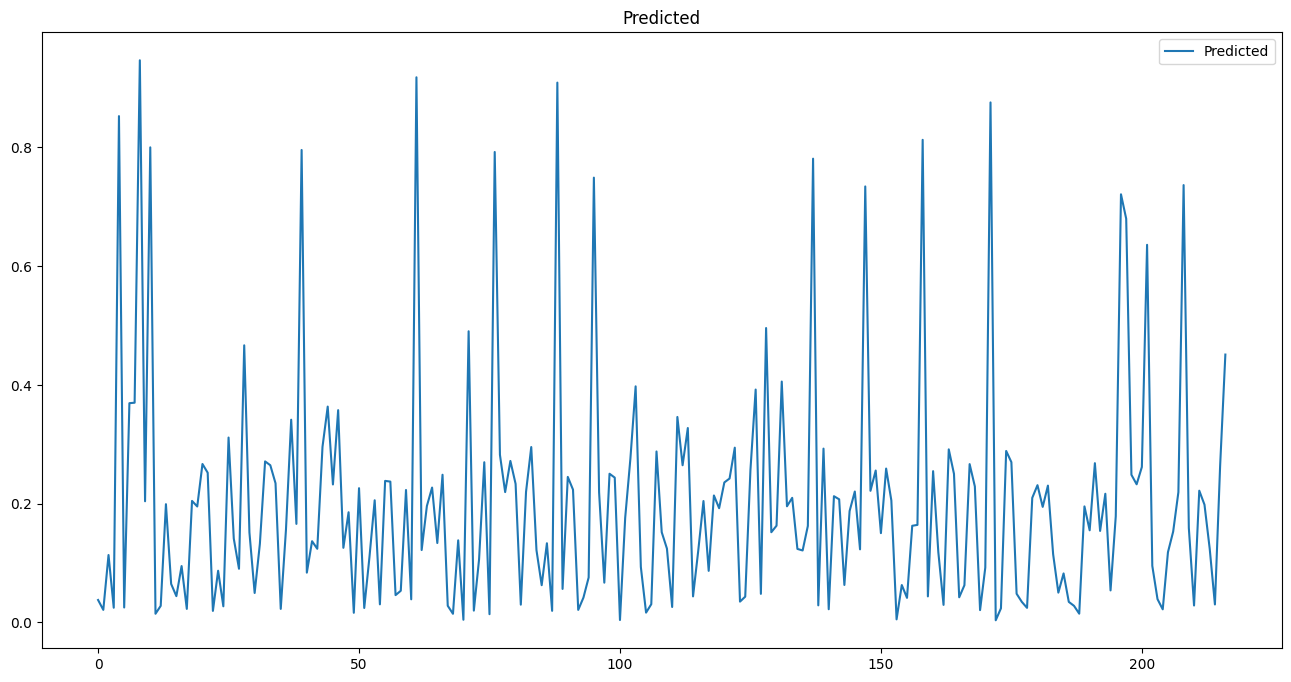

In [68]:
#plot prdicted values
plt.figure(figsize=(16,8))
plt.title("Predicted")
plt.plot(y_pred_rfr, label="Predicted")
plt.legend()
plt.show()

In [69]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("Mean Squared Error:", mse_rfr)

Mean Squared Error: 7.916075912058338e-05
